# Kernel Density Estimation

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats

plot_pic_width = 15
plot_pic_height = 5

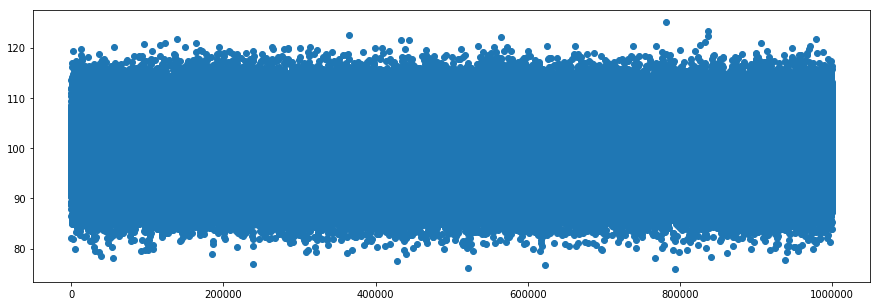

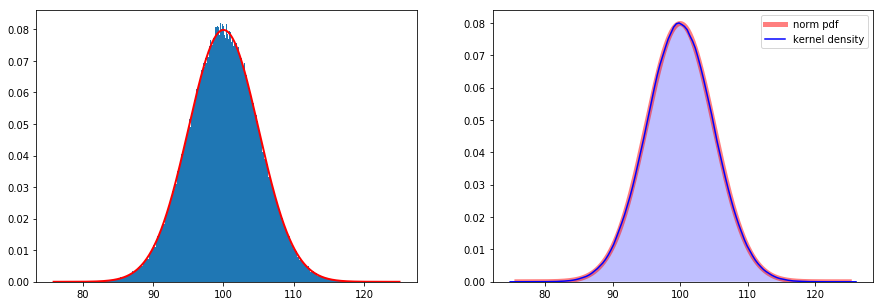

In [6]:
# Random Noramal
nsize = 1000000
mu = 100
sigma = 5
x = np.random.normal(mu, sigma, nsize)

plt.figure(figsize=(plot_pic_width,plot_pic_height))
plt.plot(x, 'o')
fig, axs = plt.subplots(1,2, figsize=(plot_pic_width,plot_pic_height))
count, bins, ignored = axs[0].hist(x, int(math.sqrt(len(x))), density = True, label='histogram')
axs[0].plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r', label='norm pdf')
axs[1].plot(bins, stats.norm.pdf(bins, mu, sigma), color='r', lw=5, alpha=0.5, label='norm pdf')
axs[1] = sns.kdeplot(x, shade=True, color="b", label='kernel density')
plt.show()

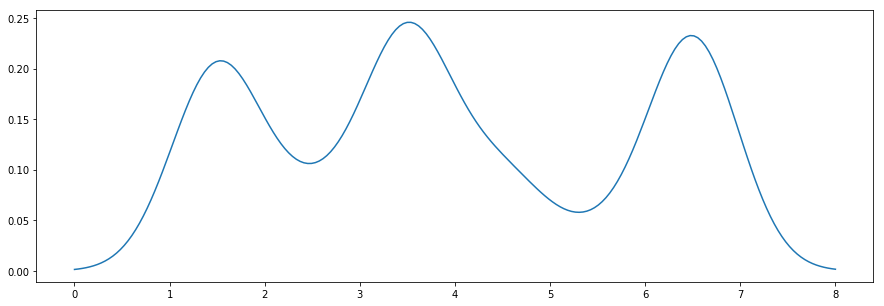

In [3]:
from scipy.stats import gaussian_kde

data = [1.5]*7 + [2.5]*2 + [3.5]*8 + [4.5]*3 + [5.5]*1 + [6.5]*8
density = gaussian_kde(data)
xs = np.linspace(0,8,200)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.figure(figsize=(plot_pic_width,plot_pic_height))
plt.plot(xs,density(xs))
plt.show()

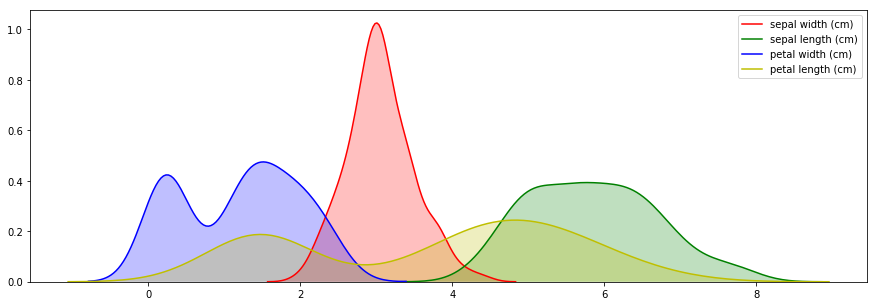

In [4]:
# library and dataset
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

#df = sns.load_dataset('iris')
plt.figure(figsize=(plot_pic_width,plot_pic_height))
# plot of 2 variables
p1=sns.kdeplot(df['sepal width (cm)'], shade=True, color="r")
p1=sns.kdeplot(df['sepal length (cm)'], shade=True, color="g")
p1=sns.kdeplot(df['petal width (cm)'], shade=True, color="b")
p1=sns.kdeplot(df['petal length (cm)'], shade=True, color="y")
plt.show()